### Problem statement




**dataset:** https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')  # ignore warnings
import logging

In [3]:
# read dataset
data = pd.read_excel("Concrete_Data.xls")


In [4]:
data.head(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

### Data Description
Given is the variable name, variable type, the measurement unit and a brief description. 
The concrete compressive strength is the regression problem. The order of this listing 
corresponds to the order of numerals along the rows of the database. 

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable 

In [6]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

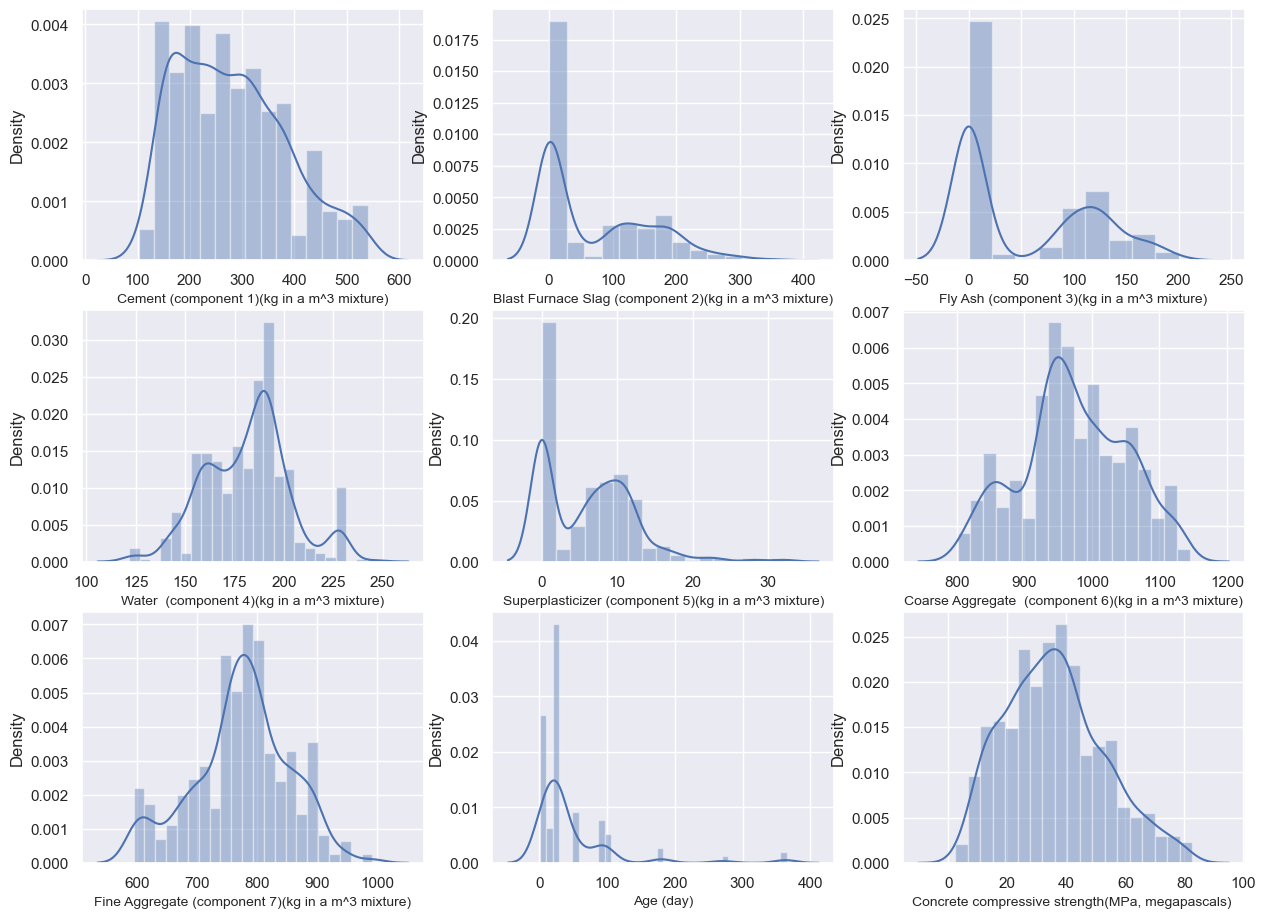

In [7]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in data.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [8]:
data['Concrete compressive strength(MPa, megapascals) '].mode()

0    33.398217
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

Target variable is nearly gaussian distribution or normal distribution with slightly positive skewness.

## Data Transformation

In [9]:
X = data.drop(['Concrete compressive strength(MPa, megapascals) '],axis=1)

In [10]:
y = data['Concrete compressive strength(MPa, megapascals) ']

In [11]:
# normalising features
# before doing the log transformation, 
#let's add 1 to each value in everycolumn so that we don't get exception while calculationg the log for value 0
#log(0)=invalid and log(1)=0
for column in X.columns:
    X[column]+=1
    X[column] = np.log(X[column])

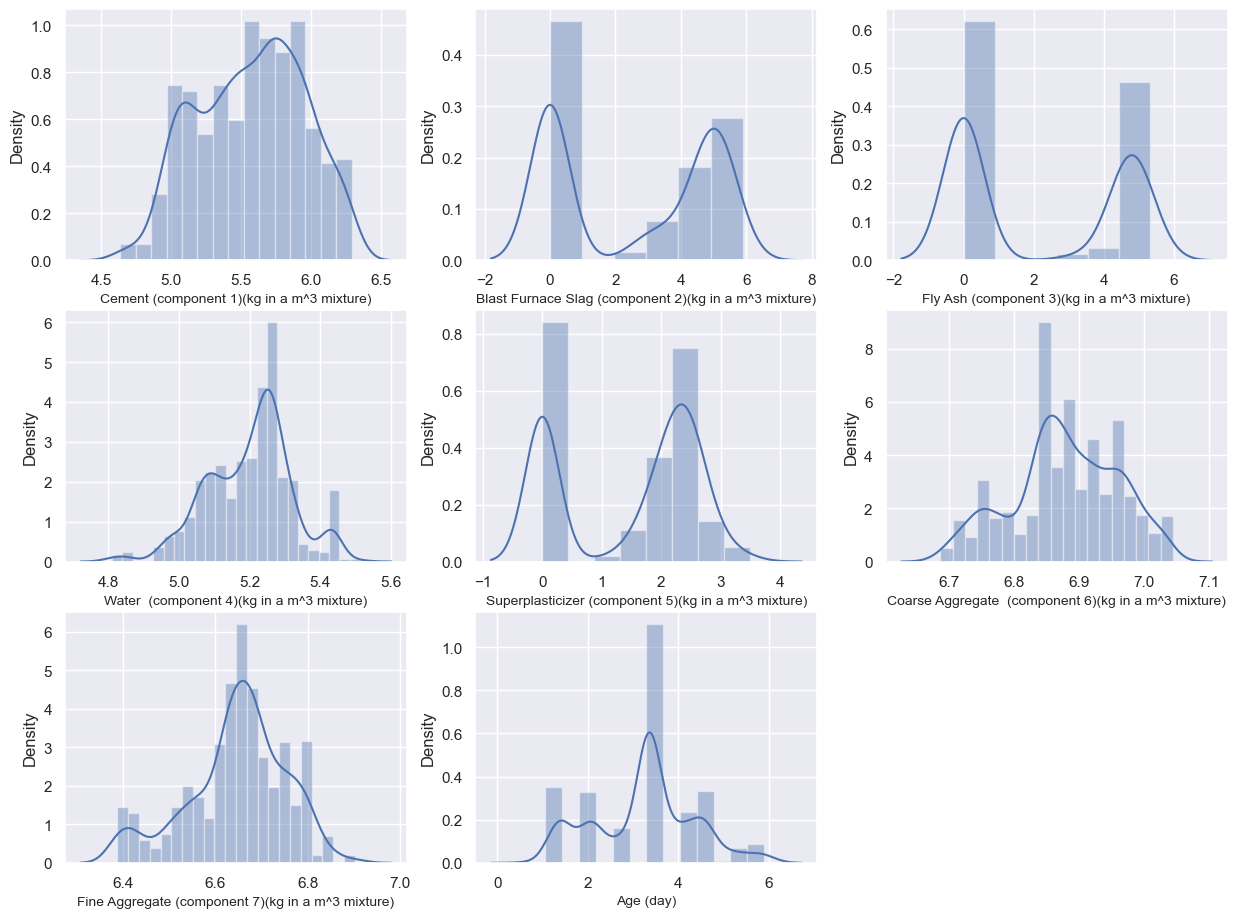

In [12]:

plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(X[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

<AxesSubplot:>

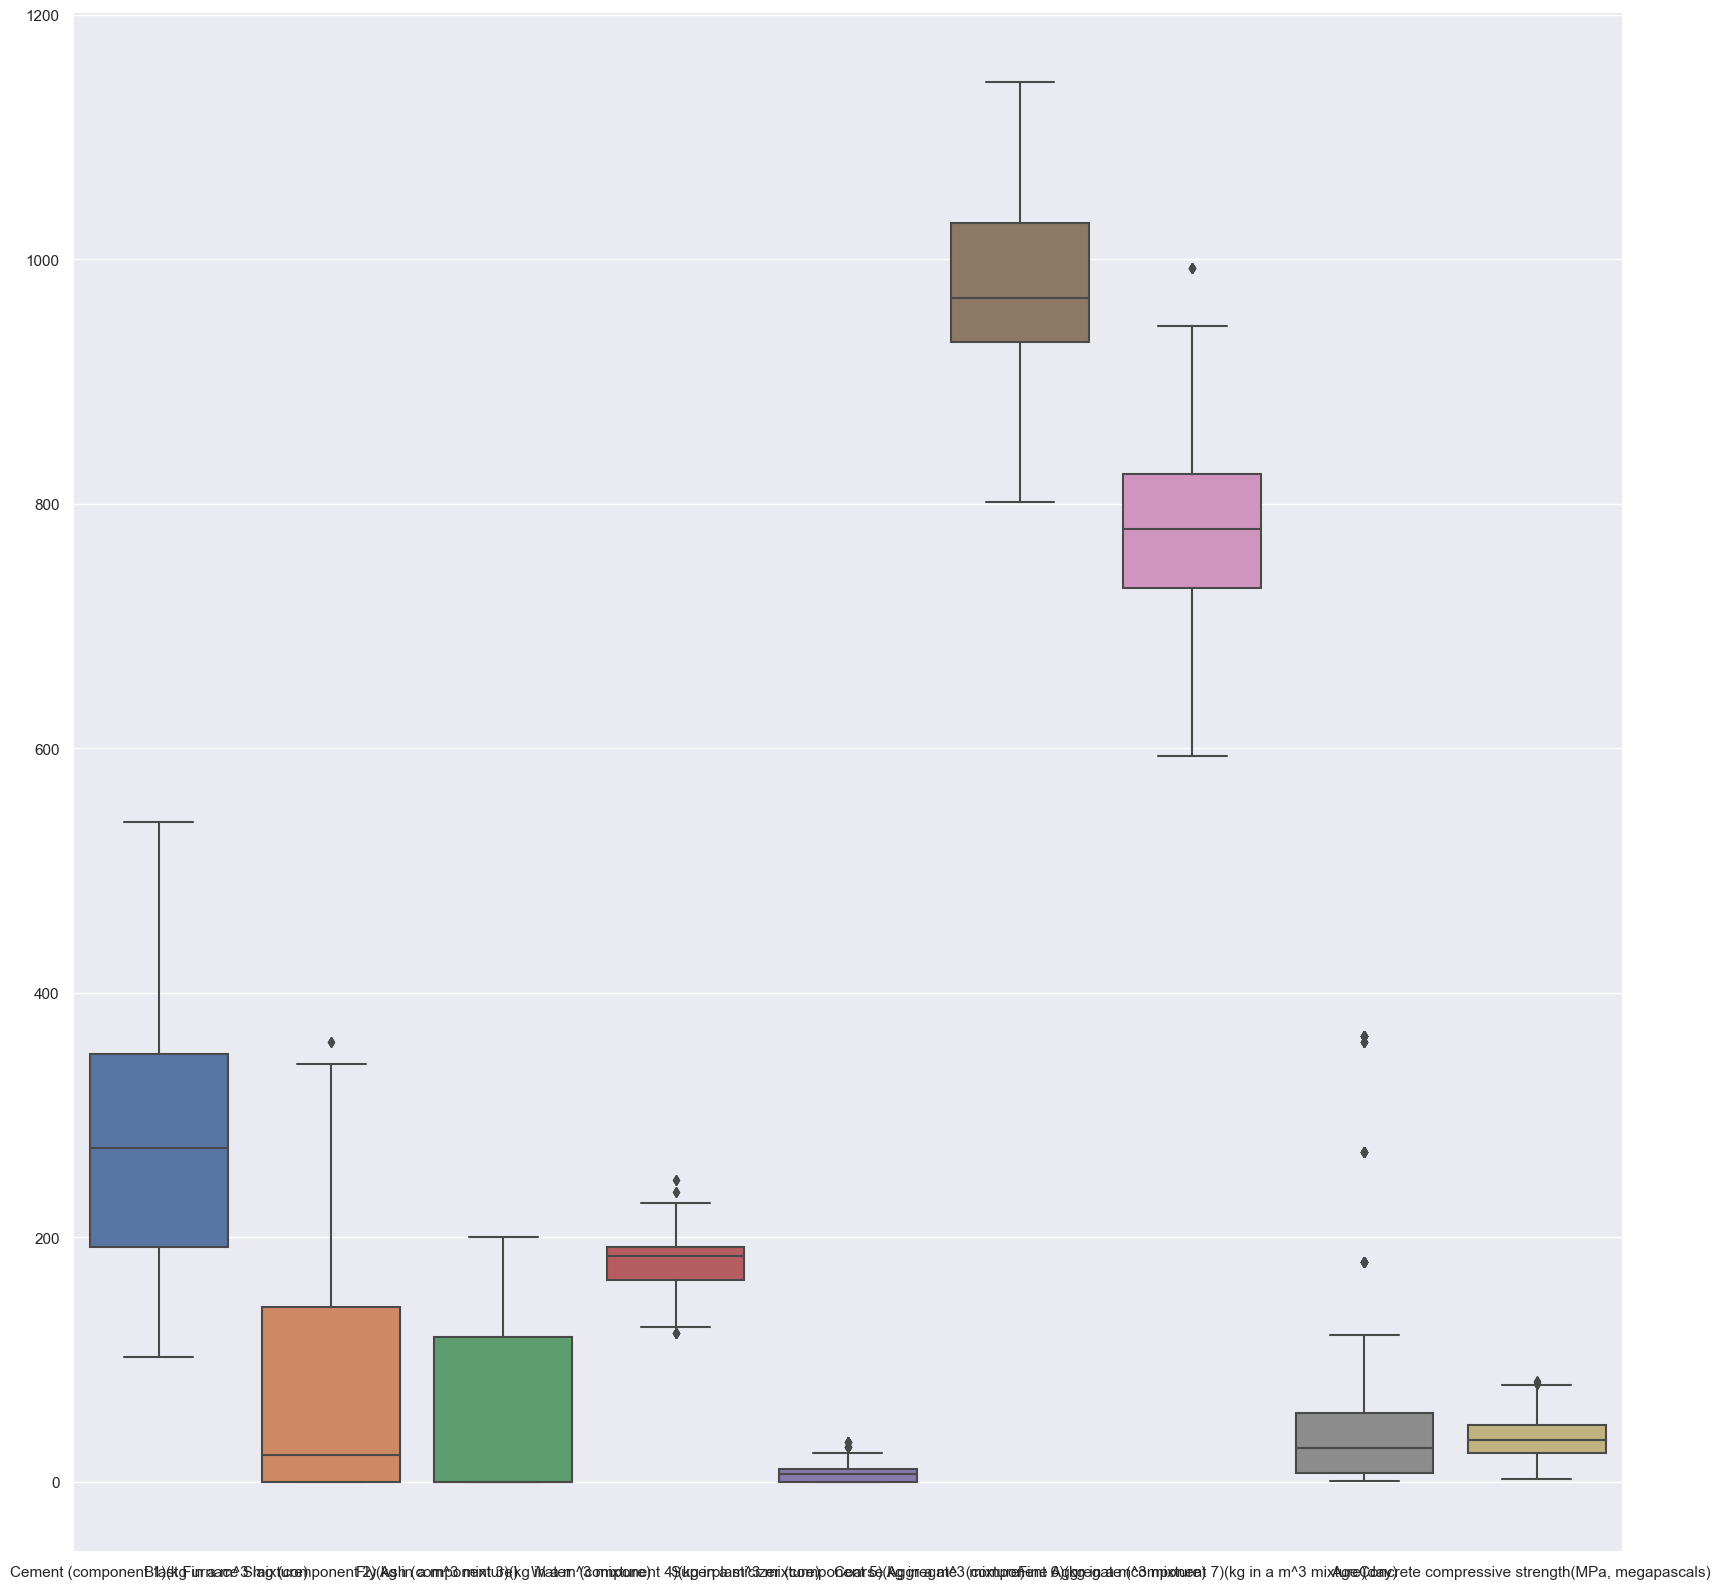

In [13]:
# check for outliers
fig, ax =  plt.subplots(figsize=(20,20))
sns.boxplot(data = data, ax = ax)

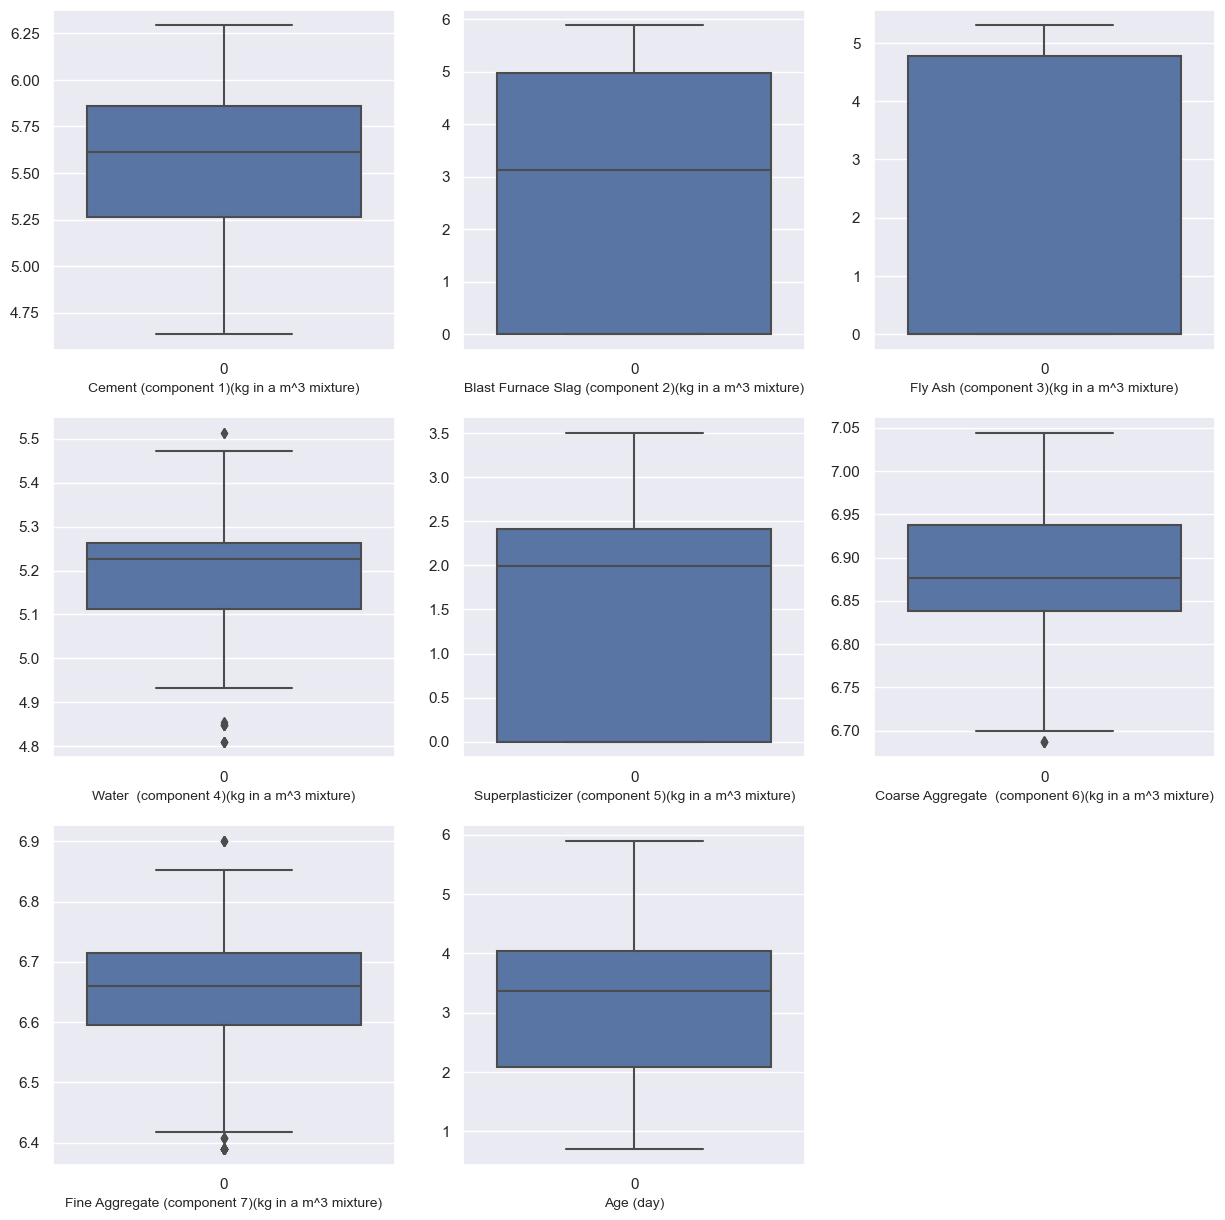

In [14]:
# check for outliers 

plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plt.subplot(3,3,plotnumber)
    sns.boxplot((X[column]))
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

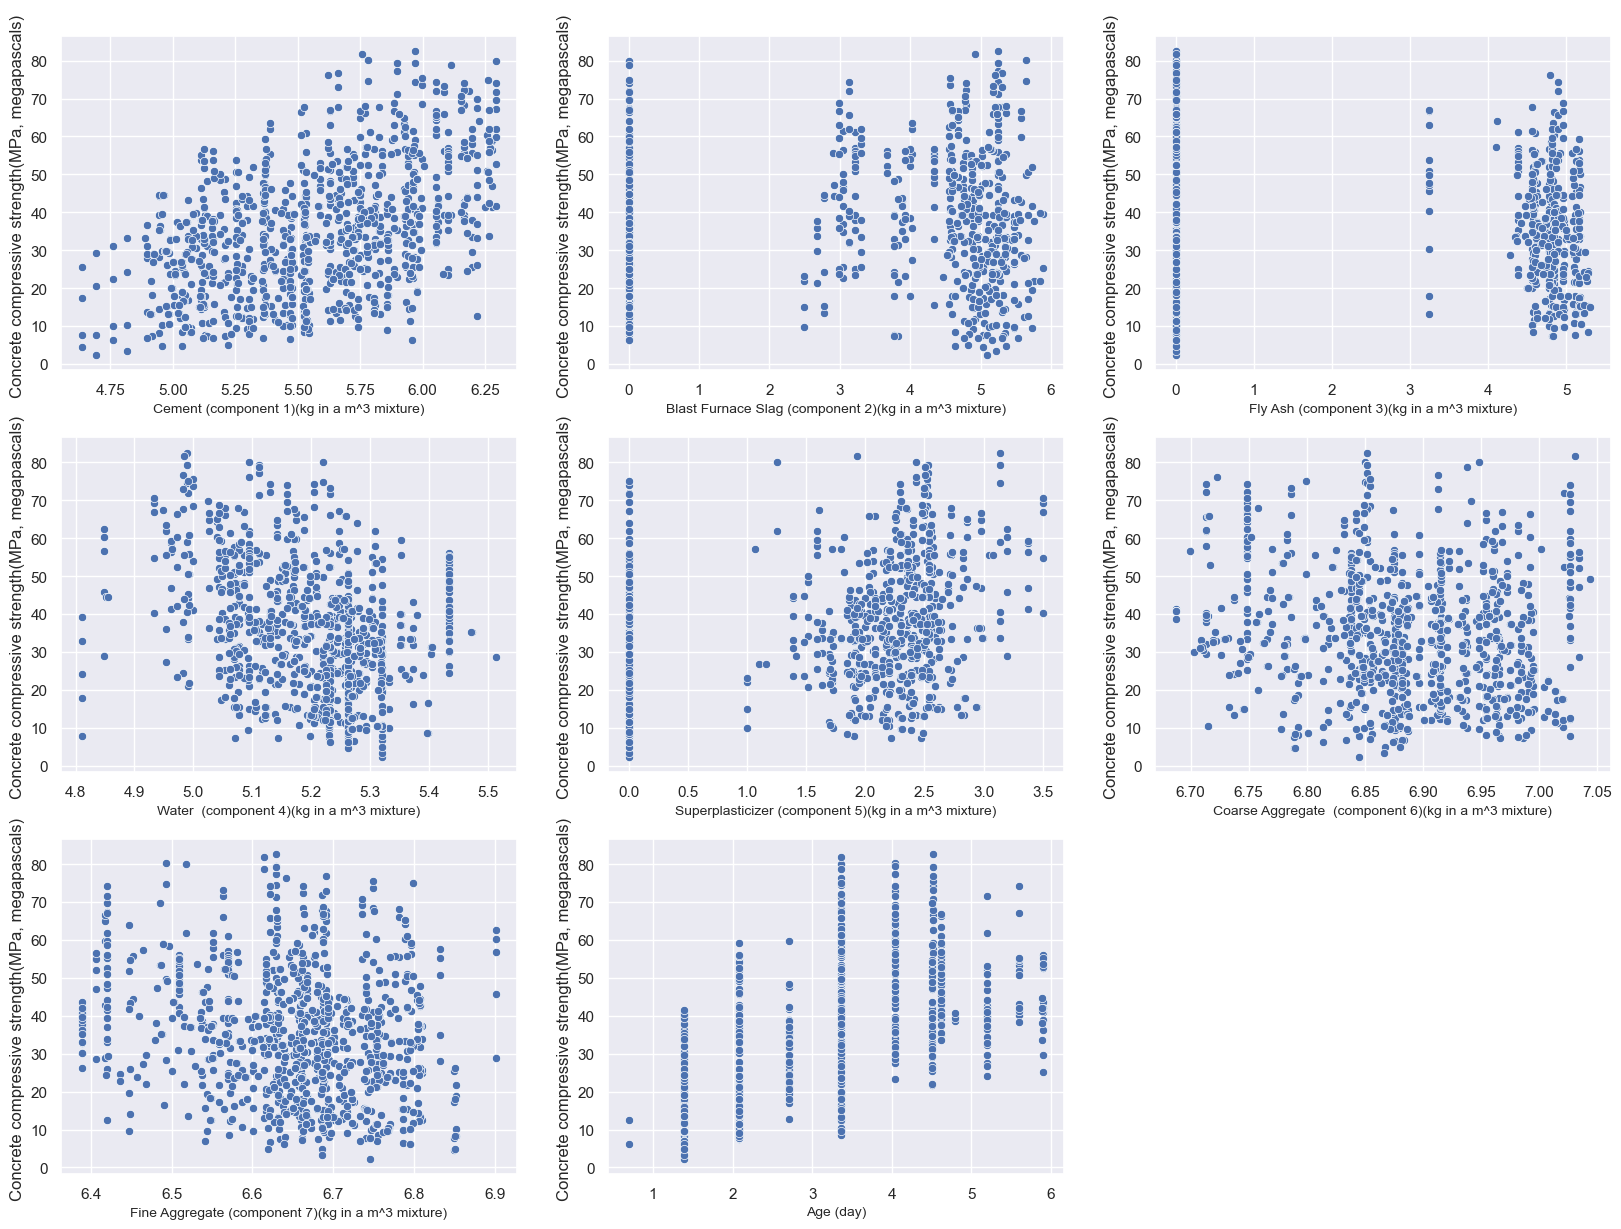

In [15]:
# check how our features are related to the target column
plt.figure(figsize=(20,20),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.scatterplot(data=data,x=X[column] ,y=y)
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

Proportionality is visible between cement and compressive strength from 1st figure.\
Well the relationship doesn't look particularly linear but we will try using Linear Regression and see how it works on our data.
We will also Decision tree regressor, Random forest regressor,Gradientboost,XGBoost regressor and compare our results between the models.

In [16]:
# let's check for correlation using heatmap

<AxesSubplot:title={'center':'Pearson Correlation'}>

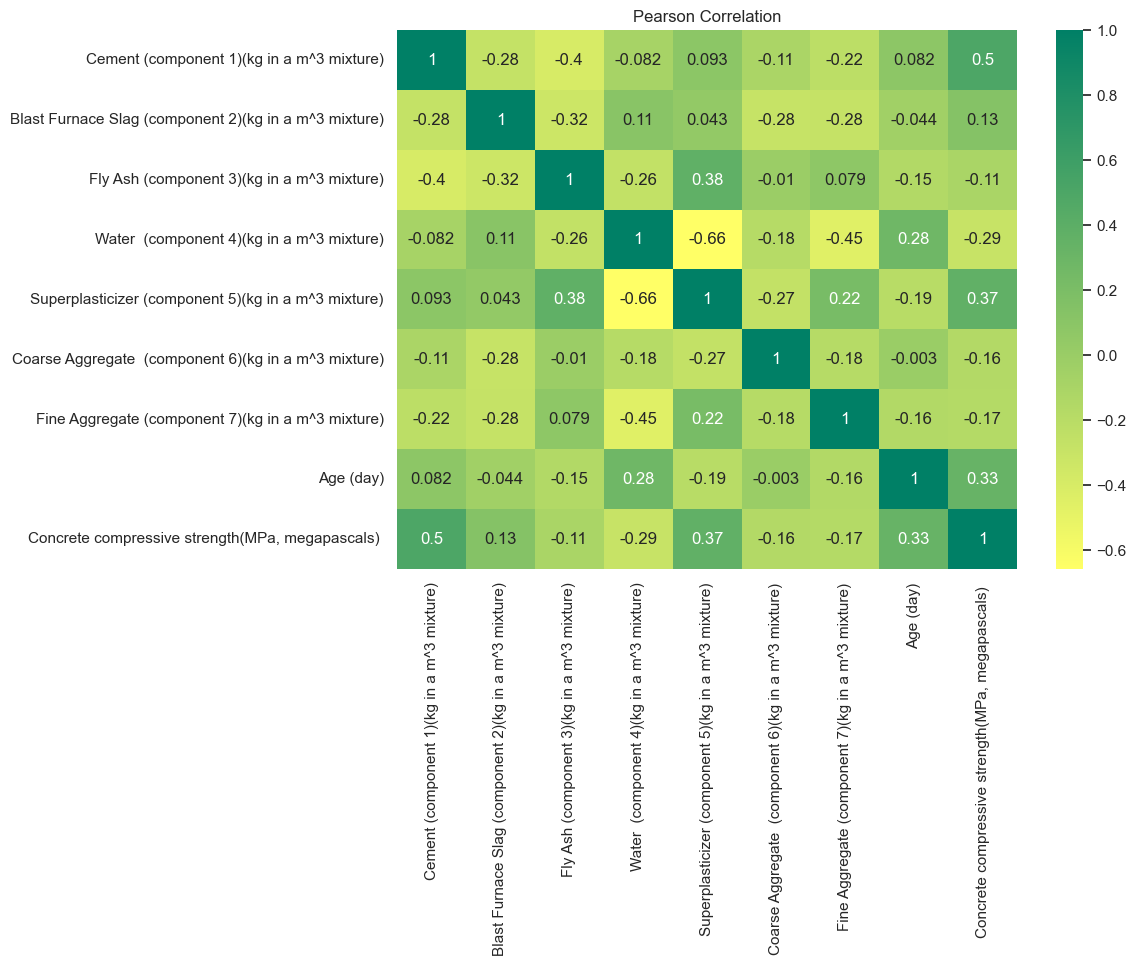

In [17]:
#Pearson Correlation
plt.figure(figsize=(10,7))
plt.title('Pearson Correlation')
sns.heatmap(data.corr(),annot=True, cmap = 'summer_r')

Great! none of our columns seem to be correlated.

<AxesSubplot:title={'center':'spearman rank Correlation matrix'}>

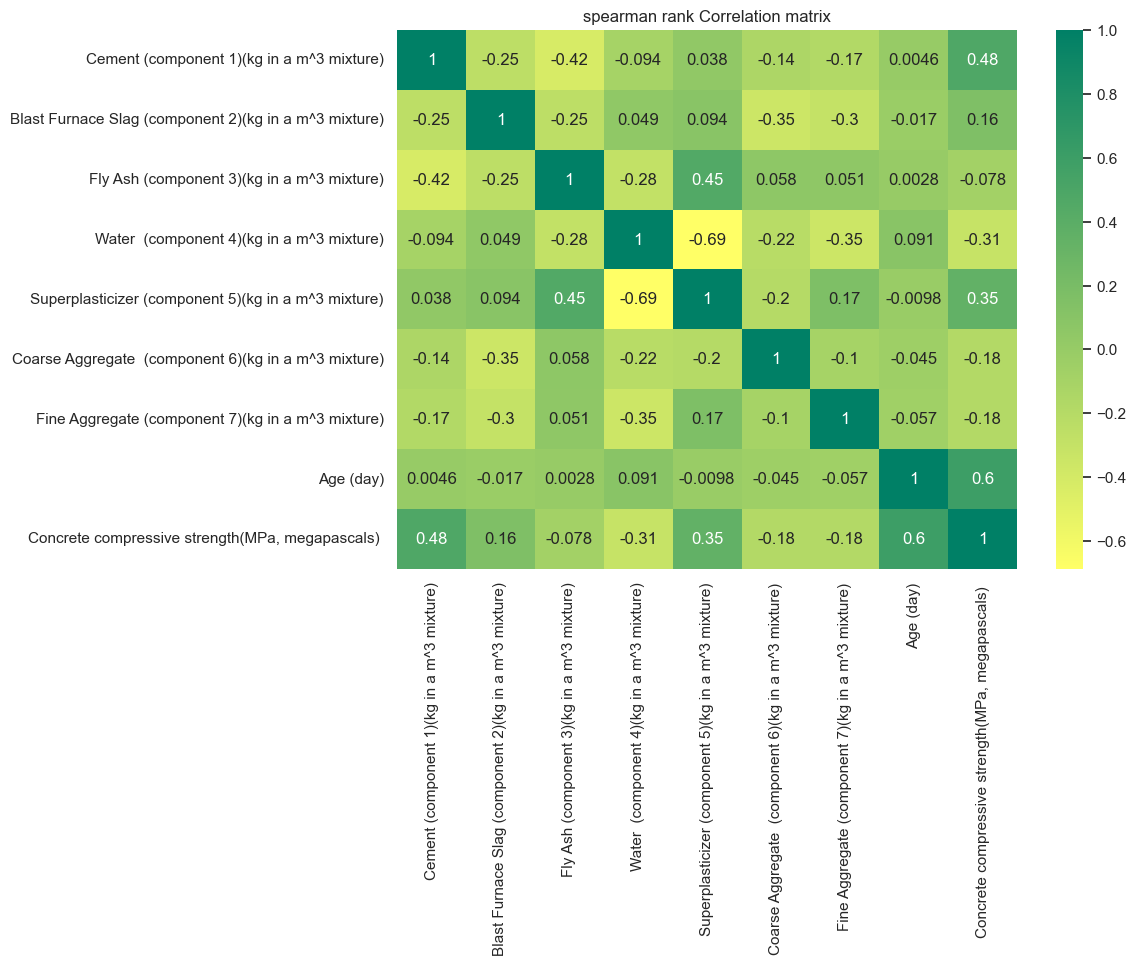

In [18]:
#Spearman rank correlation matrix to capture non linear relationships
plt.figure(figsize=(10,7))
plt.title('spearman rank Correlation matrix')
sns.heatmap(data.corr( method='spearman'),annot=True, cmap = 'summer_r')

1.Age, Cement, super plasticizer and Blast furnace slag are in positive correlation to the Concrete compressive strength.\
2.While water, coarse aggregae and fine aggregate are in negative correlation to the Concrete compressive strength.\
3.Fly ash is having nearly 0 correlation with the target variable.\
4.Super plasticizer is having negative correlation to the water.

In [19]:
# spliting dataset into train and test 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state=1,)

#x_train = pd.DataFrame(scalar.fit_transform(x_train),columns = x_train.columns, index=x_train.index )
#x_test = pd.DataFrame(scalar.fit_transform(x_test),columns = x_test.columns, index=x_test.index)

In [20]:
y_train.shape

(721,)

In [21]:
# scaling data
from sklearn.preprocessing import StandardScaler

In [22]:
scalar = StandardScaler()

In [23]:
X_train= scalar.fit_transform(x_train)
X_test= scalar.transform(x_test)

In [24]:
#####################################
X_train = pd.DataFrame(X_train ,columns = x_train.columns, index=x_train.index )

In [25]:
X_train

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
185,-0.430135,-1.032601,1.035053,0.419334,0.234715,-0.032155,1.127669,-0.478932
286,-0.968017,-1.032601,1.263161,-0.512518,0.626552,1.047375,0.043317,0.114357
600,0.684841,-1.032601,-0.891642,0.757997,-1.244486,-0.020436,0.082926,-0.478932
691,-0.556166,1.033154,-0.891642,1.033417,-1.244486,0.048130,-0.307801,-1.668447
474,1.410924,0.308563,0.951129,-0.900593,0.868549,-0.033175,-0.809374,0.114357
...,...,...,...,...,...,...,...,...
960,0.216580,0.964560,-0.891642,-0.577242,0.589111,0.010085,0.244619,0.114357
847,0.179072,0.995487,1.049152,-0.392900,0.762046,-1.990434,0.374930,0.114357
715,-1.626543,1.201214,-0.891642,1.033417,-1.244486,0.027854,-0.327114,1.143508
905,-1.746709,-1.032601,1.260625,-0.007447,0.845102,-0.109888,0.374930,0.114357


In [26]:
X_test = pd.DataFrame(X_test ,columns = x_test.columns, index=x_test.index)

In [27]:
X_test

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
339,0.336371,-1.032601,1.116491,-0.256001,0.806221,0.658298,-0.263527,-1.668447
244,-0.249982,-1.032601,1.023884,0.300664,0.567593,-0.252947,0.865728,-1.668447
882,-1.650897,1.008114,1.061461,0.886220,0.567593,-0.700962,-0.269290,0.114357
567,-0.664235,1.016425,-0.891642,0.256933,-1.244486,1.285607,-0.188914,-1.044649
923,-1.266138,1.191317,1.275469,1.539302,0.845102,-2.035327,-1.867857,0.114357
...,...,...,...,...,...,...,...,...
1018,0.543790,-1.032601,1.151726,0.109520,0.956499,-1.334524,0.066855,0.114357
1015,0.552829,1.053998,-0.891642,0.261499,0.717348,-0.238812,-0.843304,0.114357
341,0.336371,-1.032601,1.116491,-0.256001,0.806221,0.658298,-0.263527,0.114357
750,1.713570,-1.032601,-0.891642,0.886220,-1.244486,1.832258,-2.253372,0.114357


## Linear regression

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
#bulilding  linear regression model

lin_reg= LinearRegression()

In [32]:
# fitting training data
lin_reg.fit(X_train ,y_train)

LinearRegression()

In [33]:
y_pred_train= lin_reg.predict(X_train)

In [34]:
# prediction on test data
y_pred_test = lin_reg.predict(X_test)

In [36]:

lin_reg.score(X_train , y_train)

0.8157535565445929

In [38]:
# check r2 score
from sklearn.metrics import r2_score

In [39]:
r2score= r2_score(y_test , y_pred_test)
r2score

0.7649532026490551

In [40]:
# create a function for adjusted R squared

def adj_r2(X,y):
    r2 = lin_reg.score(X,y)
    n= X.shape[0]
    p= X.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [41]:
adj_r2(X_test ,y_test)

0.7586852880530299

In [42]:
#valuation
print('r2_score training = ' , r2_score(y_train ,y_pred_train))
print('adjusted r2 = ' , adj_r2(X_train ,y_pred_train))
print()
print('r2_score test =', r2_score(y_test ,y_pred_test))
print('adjusted r2 = ', adj_r2(X_test ,y_test))

r2_score training =  0.8157535565445929
adjusted r2 =  1.0

r2_score test = 0.7649532026490551
adjusted r2 =  0.7586852880530299


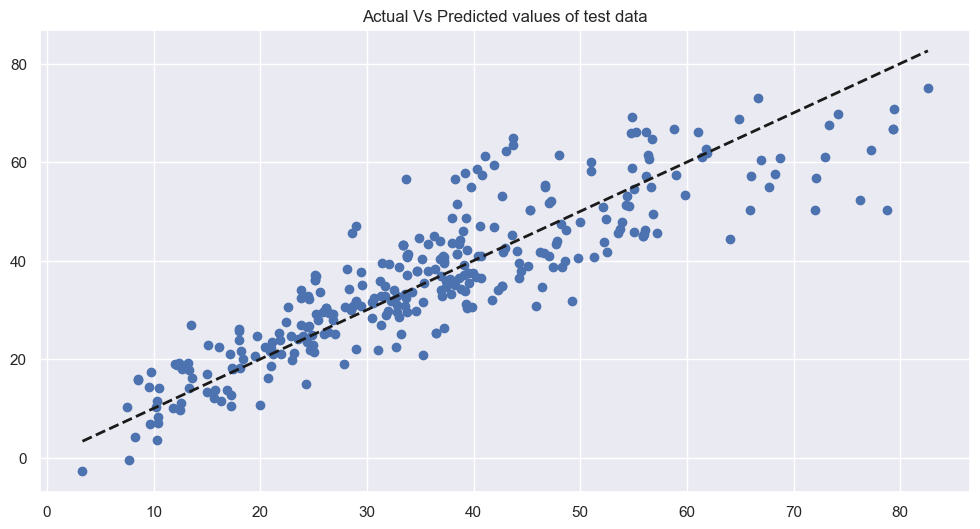

In [47]:
#actual test values vs predicted test values
plt.figure(figsize=(12,6))
plt.title('Actual Vs Predicted values of test data')
plt.scatter(y_test,y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

## 2. Decision tree Regressor

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [49]:
Dtree= DecisionTreeRegressor()

In [50]:
data.columns.values

array(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '], dtype=object)

In [51]:
X = data.drop('Concrete compressive strength(MPa, megapascals) ',axis=1) # features
y = data['Concrete compressive strength(MPa, megapascals) '] # label/target

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
param = { 'criterion':['squared_error','friedman_mse', 'absolute_error','poisson'],
          'splitter':['best','random'],
          'min_samples_split': range(2,20),
          'min_samples_leaf': range(1,20)
                    }

In [55]:
gcv=GridSearchCV(estimator=Dtree ,param_grid=param ,n_jobs=-1,cv=2)

In [56]:
gcv.fit(X_train ,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'min_samples_leaf': range(1, 20),
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

In [65]:
gcv.best_params_

{'criterion': 'friedman_mse',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'random'}

In [66]:
gcv.best_score_

0.8074950134396557

In [67]:
Dtree_new = DecisionTreeRegressor(criterion='squared_error',min_samples_leaf=1,min_samples_split=7)

In [68]:
Dtree_new.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_split=7)

In [69]:
y_pred_train = Dtree_new.predict(X_train)

In [70]:
y_pred_test = Dtree_new.predict(X_test)

In [71]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(824, 8)
(206, 8)
(824,)
(206,)


In [72]:
#training score
r2_score(y_train , y_pred_train)

0.976788148278505

In [73]:
#test score
r2_score(y_test ,y_pred_test)

0.8066801953344217

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
# accuracy score is classification score

In [76]:
Dtree_new.feature_importances_

array([0.36322022, 0.07479709, 0.02468686, 0.14060667, 0.02152008,
       0.0097757 , 0.04286657, 0.32252682])

<AxesSubplot:>

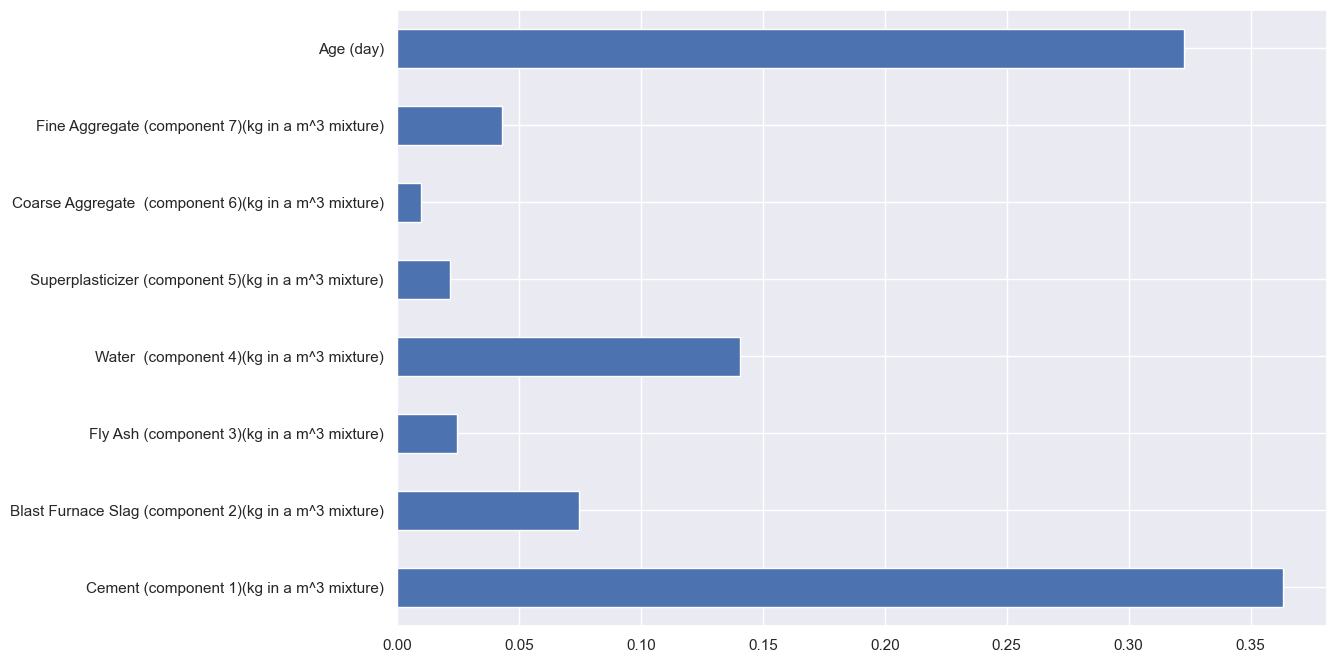

In [77]:
importances = pd.Series(Dtree_new.feature_importances_ , index=X.columns)
importances.plot(kind = 'barh', figsize=(12,8))

Top 4 contributors to strength(Mpa) are: Cement , age , water, 
Superplasticizer , Blast furnance slag.

## 3.Random forest Regressor 

In [78]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
params = {'n_estimators':[5,10,20,40,80,100,200],
          'criterion':['mse','mae'],
          'max_depth':[2,5,10,20],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,6,8,10],
          'oob_score': [True]}

In [81]:
rscv = RandomizedSearchCV(estimator = rf, param_distributions = params, n_iter = 10, scoring = 'r2', cv = 10, 
                                random_state=42, n_jobs=-1, return_train_score=True)

In [82]:
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 5, 10, 20],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 4, 8, 12],
                                        'n_estimators': [5, 10, 20, 40, 80, 100,
                                                         200],
                                        'oob_score': [True]},
                   random_state=42, return_train_score=True, scoring='r2')

In [83]:
rscv.best_params_

{'oob_score': True,
 'n_estimators': 80,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_depth': 20,
 'criterion': 'mse'}

In [84]:
rscv.best_score_

0.889566546103039

In [85]:
rf1= rscv.best_estimator_

In [86]:
rf1.fit(X_train , y_train)

RandomForestRegressor(criterion='mse', max_depth=20, min_samples_leaf=4,
                      min_samples_split=8, n_estimators=80, oob_score=True)

In [87]:
# train score
y_pred_train = rf1.predict(X_train)
r2_score(y_train , y_pred_train)

0.9533619320347211

In [88]:
# test score
y_pred_rf= rf1.predict(X_test)
r2_score(y_test , y_pred_rf)*100

86.5279893856818

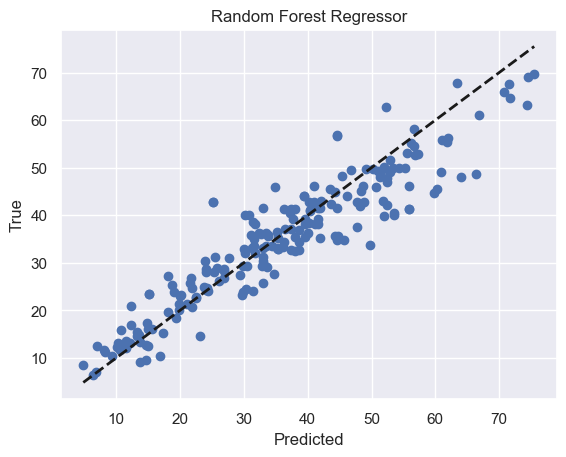

In [89]:
plt.scatter(y_test , y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

## 4.XG boost Regressor

In [90]:
import xgboost

In [91]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBRegressor()

In [92]:
parameters = {
          'learning_rate': [0.1,0.2,0.5,0.8,1],
          'max_depth': [2,3,4,5,6,7,8,10],
          'subsample': [0.001,0.009,0.01,0.09,0.1,0.4,0.9,1],
          'min_child_weight': [1,2,4,5,8],
          'gamma': [0.0,0.1,0.2,0.3],
          'colsample_bytree': [0.3,0.5,0.7,1.0,1.4],
          'reg_alpha': [0,0.1,0.2,0.4,0.5,0.7,0.9,1,4,8,10,50,100],
          'reg_lambda': [1,4,5,10,20,50,100,200,500,800,1000]    
}

In [93]:
xgcv = RandomizedSearchCV(estimator=xgb , param_distributions=parameters ,cv=10 , scoring='r2',n_jobs=-1)

In [94]:
xgcv.fit(X_train , y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,...
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.7, 1.0,
                                                             1.4],
 

In [95]:
xgcv.best_params_ # best prarameters

{'subsample': 0.9,
 'reg_lambda': 50,
 'reg_alpha': 0.2,
 'min_child_weight': 5,
 'max_depth': 6,
 'learning_rate': 0.8,
 'gamma': 0.3,
 'colsample_bytree': 1.0}

In [96]:
xgcv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.8, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.2, reg_lambda=50, ...)

In [97]:
xgcv.best_score_

0.9156510465484144

In [98]:
xgb_reg = xgcv.best_estimator_ # model with hyperparamter tuning

In [99]:
xgb_reg.fit(X_train ,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.8, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.2, reg_lambda=50, ...)

In [100]:
# prediction on test data
y_pred_xg = xgb_reg.predict(X_test)

In [101]:
r2_score(y_test,y_pred_xg)

0.9094739376101172

In [102]:
# training data
y_pred_train = xgb_reg.predict(X_train)

In [103]:
r2_score(y_train , y_pred_train)

0.9926769095068864

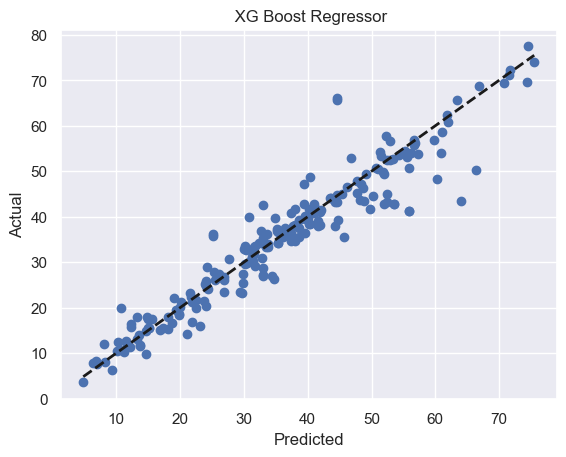

In [107]:
plt.scatter(y_test , y_pred_xg)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(" XG Boost Regressor")
plt.show()

In [104]:
# XGBoost Regressor is the best with 90% score

In [108]:
## pickling the model
import pickle
pickle.dump(xgb_reg , open('xgb_regressor.pkl' , 'wb'))

In [110]:
ccs_pickled_model= pickle.load(open('xgb_regressor.pkl' , 'rb'))

In [162]:
# prediction result test
ccs_pickled_model.predict(scalar.transform(X_train.iloc[[325]]))

array([7.1172075], dtype=float32)

In [132]:
X_test[:1]

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365


In [159]:
X_train.iloc[[325]]

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
714,153.0,102.0,0.0,192.0,0.0,888.0,943.1,7


In [160]:
data.iloc[[714]]

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
714,153.0,102.0,0.0,192.0,0.0,888.0,943.1,7,8.374375
